In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# LSFF: generate DALYs attributable to risk factors maps

In [2]:
import geopandas as gpd, matplotlib as mpl, matplotlib.backends.backend_pdf

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.name = world.name.astype(str)

world.loc[world.name=="Dem. Rep. Congo",'name'] = 'Democratic Republic of the Congo'
world.loc[world.name=="Tanzania",'name'] = 'United Republic of Tanzania'
world.rename(columns = {'name':'location_name'}, inplace=True)

In [3]:
vad_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/inputs/vitamin_a_data_summary.csv'
df = pd.read_csv(vad_path)

In [4]:
df = df[df.location_name!='Global']

In [5]:
location_name_map = {    
    'Angola': 'Angola',
    'Bangladesh': 'Bangladesh',
    'Burkina Faso': 'Burkina Faso',
    "Côte d'Ivoire": "Côte d'Ivoire",
    'Cameroon': 'Cameroon',
    'China': 'China',
    'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
    'Egypt': 'Egypt',
    'Ethiopia': 'Ethiopia',
    'Ghana': 'Ghana',
    'India': 'India',
    'Indonesia': 'Indonesia',
    'Kenya': 'Kenya',
    'Madagascar': 'Madagascar',
    'Mozambique': 'Mozambique',
    'Nepal': 'Nepal',
    'Nigeria': 'Nigeria',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sudan': 'Sudan',
    'Uganda': 'Uganda',
    'United Republic of Tanzania': 'United Republic of Tanzania',
    'Viet Nam': 'Vietnam',
    'Myanmar': 'Myanmar',
    'Niger': 'Niger'
}

df.location_name = df.location_name.map(location_name_map)

In [6]:
assert(len(df[df.location_name.isna()])==0)

In [7]:
df.rename(columns={"('dalys_attributable_to_vad_among_children_under_5', 'mean')":'mean_vad_dalys_u5'}, inplace=True)

In [8]:
assert len([i for i in df.location_name.unique() if i not in world.location_name.unique()])==0

In [9]:
shapefiles = world.merge(df[['location_name','mean_vad_dalys_u5']], on = 'location_name', how = 'right')

In [10]:
def plot_map(risk, var_name, n_colors = 6):
    fig, ax = plt.subplots(figsize=(30,10))

    ax.set_aspect('equal')
    ax.set_title(f'DALYs attributable to {risk} among children under 5', fontsize = 24)

    # plot country outlines
    base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color='white', edgecolor='gray')

    # rf_df = shapefiles[shapefiles.Risk==risk_factor]
    scale_max = shapefiles[var_name].max()
    scale_min = shapefiles[var_name].min()

    # color in countries for which we have counts
    cmap = plt.cm.get_cmap('RdYlBu_r', n_colors) #colorscale, discretized to n_colors bins
    norm = mpl.colors.Normalize(vmin=scale_min, vmax=scale_max) #normalize color scale
    # norm = mpl.colors.LogNorm(vmin=0, vmax=scale_max),
    me = shapefiles.plot(ax=base,
                         column=var_name,
                         cmap=cmap,
                         norm = norm, 
                         legend=True,
                         legend_kwds = {'ticks':np.arange(scale_min,scale_max+(scale_max/n_colors),(scale_max-scale_min)/n_colors)},
                         edgecolor = 'gray')
    return fig

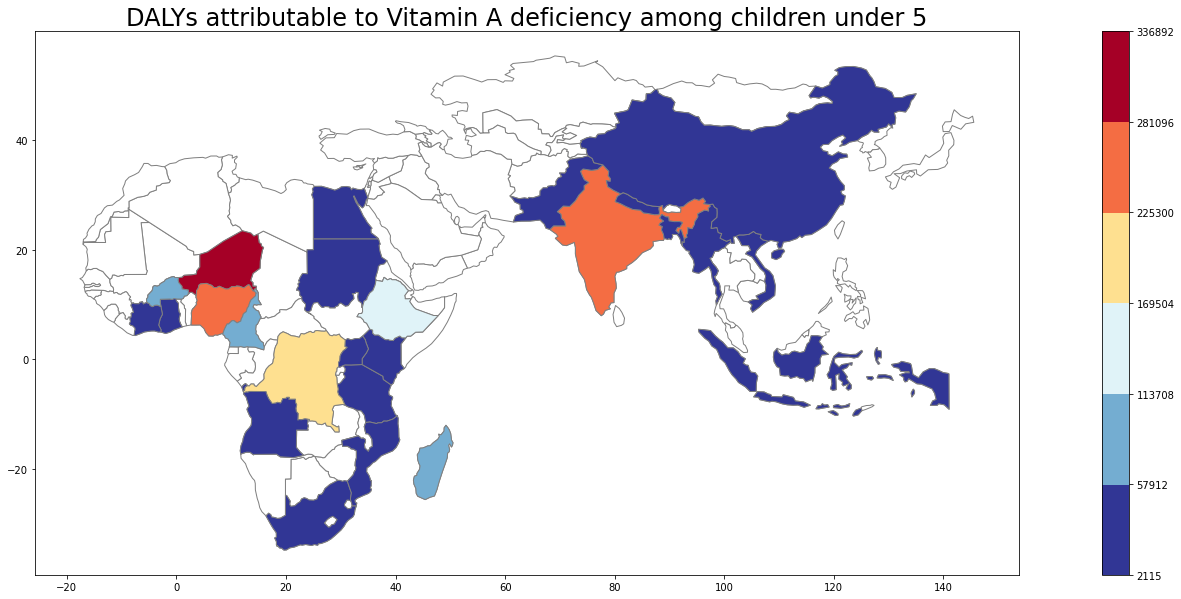

In [11]:
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/u5_vad_dalys_map.pdf'
# save_path = '/ihme/homes/beatrixh/repos/scratch/u5_vad_dalys_map.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)

fig = plot_map(risk = 'Vitamin A deficiency', var_name = 'mean_vad_dalys_u5', n_colors = 6)
pdf.savefig(fig)

pdf.close()